In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
with open("data/winequality.csv", "r") as f:
    wine_data = pd.read_csv(f)
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
wine_data.columns


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

missing_values = wine_data.isnull().sum()

X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

missing_values, X_train.shape, X_test.shape


(fixed acidity           0
 volatile acidity        0
 citric acid             0
 residual sugar          0
 chlorides               0
 free sulfur dioxide     0
 total sulfur dioxide    0
 density                 0
 pH                      0
 sulphates               0
 alcohol                 0
 quality                 0
 dtype: int64,
 (1279, 11),
 (320, 11))

multiclass classfication for loistic regression ,LDA and QRA

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# Initialize models
log_reg = LogisticRegression(max_iter=10000, random_state=42)
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()

# Train Logistic Regression
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
acc_log_reg = accuracy_score(y_test, y_pred_log_reg)

# Train LDA
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)
acc_lda = accuracy_score(y_test, y_pred_lda)

# Train QDA
qda.fit(X_train, y_train)
y_pred_qda = qda.predict(X_test)
acc_qda = accuracy_score(y_test, y_pred_qda)

acc_log_reg, acc_lda, acc_qda


/Applications/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


(0.575, 0.559375, 0.55625)

In [33]:
lda.classes_
lda.priors_
lda.scalings_


array([[ 0.2725005 , -0.88438168, -0.39750048, -0.80209003, -1.73745645],
       [-0.36184295, -0.89658731, -0.34702426,  0.64696112,  0.35018762],
       [-0.03261033, -0.36938918, -0.56420786,  0.58485442,  0.1916857 ],
       [ 0.11973325, -0.44762214, -0.5603512 , -0.72804904, -0.10289418],
       [-0.18946613, -0.22926868,  0.1746952 , -0.13773623, -0.59256535],
       [ 0.14348328, -0.02136274,  0.73948959,  0.49079214,  0.03942039],
       [-0.39116861,  0.51916233, -0.81055491, -0.29856738, -0.506519  ],
       [-0.24086628,  0.94843116,  0.94116428,  1.17394651,  0.59256357],
       [-0.02176295, -0.74565875,  0.05896611, -0.82349151, -1.23496774],
       [ 0.39927963, -0.08092082, -0.04184761, -0.0892057 ,  0.01378286],
       [ 0.73587366,  0.30293376,  0.24243895,  0.77364424,  0.34842864]])

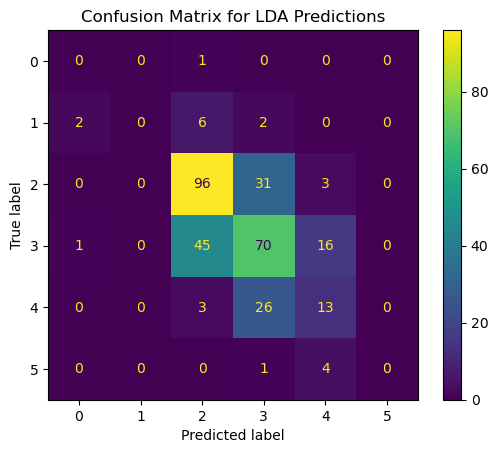

In [34]:

y_pred_lda = lda.predict(X_test)

conf_matrix_lda = confusion_matrix(y_test, y_pred_lda)

ConfusionMatrixDisplay(conf_matrix_lda).plot(values_format='d')
plt.title('Confusion Matrix for LDA Predictions')
plt.show()


In [37]:
qda.means_

array([[ 0.12915856,  2.06986119, -0.42722471,  0.13407166,  0.84967923,
        -0.41306431, -0.6122681 ,  0.46640542,  0.45353596, -0.5595355 ,
        -0.43876139],
       [-0.33729484,  0.69944219, -0.41939609,  0.20016127,  0.15022858,
        -0.27270701, -0.25678963, -0.16180461,  0.40565292, -0.31433387,
        -0.11434939],
       [-0.07603419,  0.29241197, -0.12830683,  0.01006682,  0.12532119,
         0.09474876,  0.31886624,  0.20280938, -0.04801687, -0.21174034,
        -0.49227273],
       [ 0.01574116, -0.1520513 ,  0.02208619, -0.04940488, -0.03801602,
        -0.00296917, -0.16909447, -0.05864681,  0.05962886,  0.12533498,
         0.19822292],
       [ 0.27964244, -0.67296834,  0.51438213,  0.1473524 , -0.20729107,
        -0.19726905, -0.38261907, -0.35402427, -0.08975128,  0.49843992,
         0.99970604],
       [ 0.48811733, -0.5894449 ,  0.80474749,  0.12527898, -0.36141961,
        -0.31906826, -0.47269874, -0.40186573, -0.51558683,  0.59197608,
         1.307

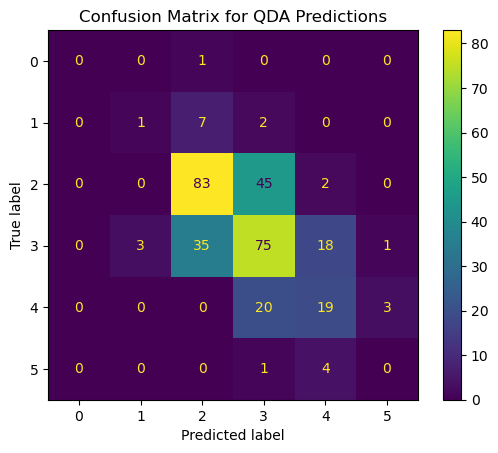

In [39]:
y_pred_qda = qda.predict(X_test)

conf_matrix_qda = confusion_matrix(y_test, y_pred_qda)

qda_classes, qda_priors, conf_matrix_qda

ConfusionMatrixDisplay(conf_matrix_qda).plot(values_format='d')
plt.title('Confusion Matrix for QDA Predictions')
plt.show()

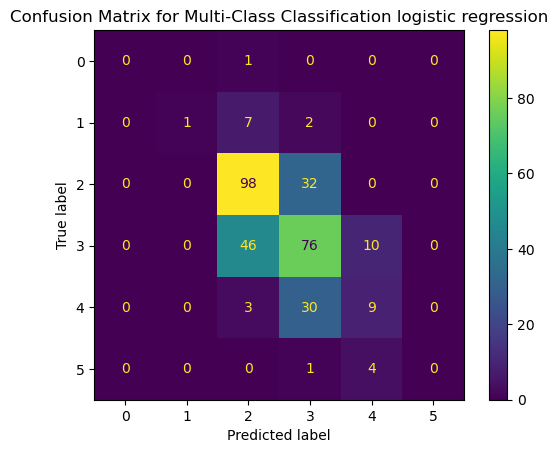

In [38]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import numpy as np


rmse_sklearn = np.sqrt(mean_squared_error(y_test, y_pred_log_reg))
rmse_sklearn
comparison_df = pd.DataFrame({'Actual Quality': y_test, 'Predicted Quality': y_pred_log_reg}).head(10)
comparison_df

conf_matrix_multiclass = confusion_matrix(y_test, y_pred_log_reg)

# Plotting the confusion matrix without specifying binary labels
ConfusionMatrixDisplay(conf_matrix_multiclass).plot(values_format='d')
plt.title('Confusion Matrix for Multi-Class Classification logistic regression')
plt.show()

binary classification for logistic regression 

In [21]:
import statsmodels.api as sm

# Convert the target variable into a binary outcome
y_binary = (y_train > 5).astype(int)

X_train_const = sm.add_constant(X_train)

glm_binom = sm.GLM(y_binary, X_train_const, family=sm.families.Binomial())
glm_result = glm_binom.fit()

glm_summary = glm_result.summary()
glm_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                quality   No. Observations:                 1279
Model:                            GLM   Df Residuals:                     1267
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -662.59
Date:                Sat, 06 Apr 2024   Deviance:                       1325.2
Time:                        18:18:11   Pearson chi2:                 1.49e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2931
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2155      0.070      3.099      0.002       0.079       0.352
x1             0.2015      0.188      1.074      0.283      -0.166       0.569
x2            -0.5336      0.097     -5.480      0.000      -0.724      -0.343
x3            -0.2060      0.124     -1.667      0.095      -0.448       0.036
x4             0.0196      0.084      0.233      0.816      -0.146       0.185
x5            -0.1773      0.080     -2.227      0.026      -0.333      -0.021
x6             0.3148      0.099      3.185      0.001       0.121       0.509
x7            -0.6039      0.109     -5.549      0.000      -0.817      -0.391
x8            -0.0432      0.169     -0.256      0.798      -0.374       0.287
x9            -0.0551      0.123     -0.447      0.655      -0.297       0.186
x10            0.4511      0.083      5.435      0.000       0.288       0.614
x11            0.9542      0.124      7.723      0.000       0.712       1.196
==============================================================================
"""

In [22]:
y_test_binary = (y_test > 5).astype(int)
X_test_const = sm.add_constant(X_test)
y_test_pred_prob = glm_result.predict(X_test_const)
y_test_pred_binary = (y_test_pred_prob > 0.5).astype(int)
binary_model_accuracy = accuracy_score(y_test_binary, y_test_pred_binary)
binary_model_accuracy

0.740625

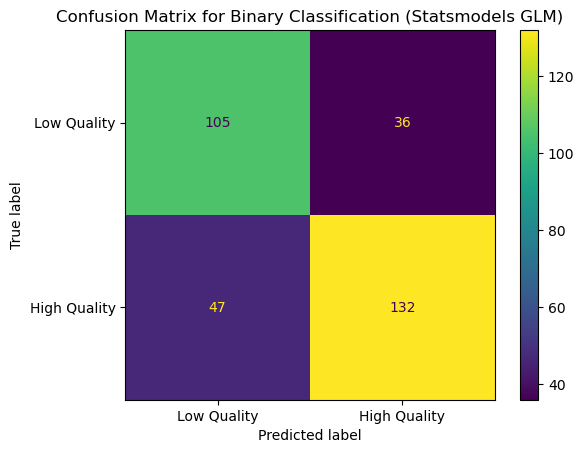

In [23]:
conf_matrix_sm = confusion_matrix(y_test_binary, y_test_pred_binary)

ConfusionMatrixDisplay(conf_matrix_sm, display_labels=['Low Quality', 'High Quality']).plot(values_format='d')
plt.title('Confusion Matrix for Binary Classification (Statsmodels GLM)')
plt.show()

using svm 

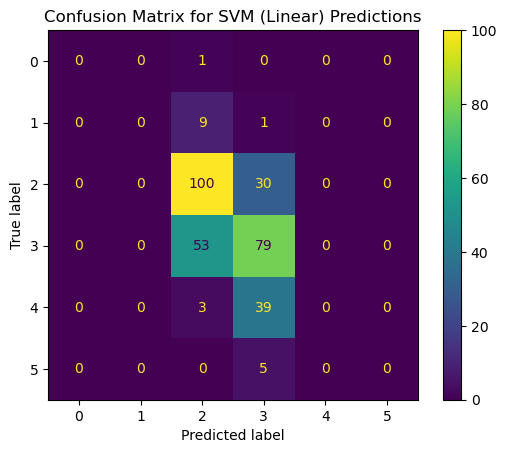

In [40]:
from sklearn.svm import SVC

svm_linear = SVC(kernel='linear', random_state=42)

svm_linear.fit(X_train, y_train)

y_pred_svm_linear = svm_linear.predict(X_test)

accuracy_svm_linear = accuracy_score(y_test, y_pred_svm_linear)
conf_matrix_svm_linear = confusion_matrix(y_test, y_pred_svm_linear)

accuracy_svm_linear, conf_matrix_svm_linear

# Plotting the confusion matrix for SVM predictions
ConfusionMatrixDisplay(conf_matrix_svm_linear).plot(values_format='d')
plt.title('Confusion Matrix for SVM (Linear) Predictions')
plt.show()


In [43]:
accuracy_svm_linear = accuracy_score(y_test, y_pred_svm_linear)
accuracy_svm_linear

0.559375

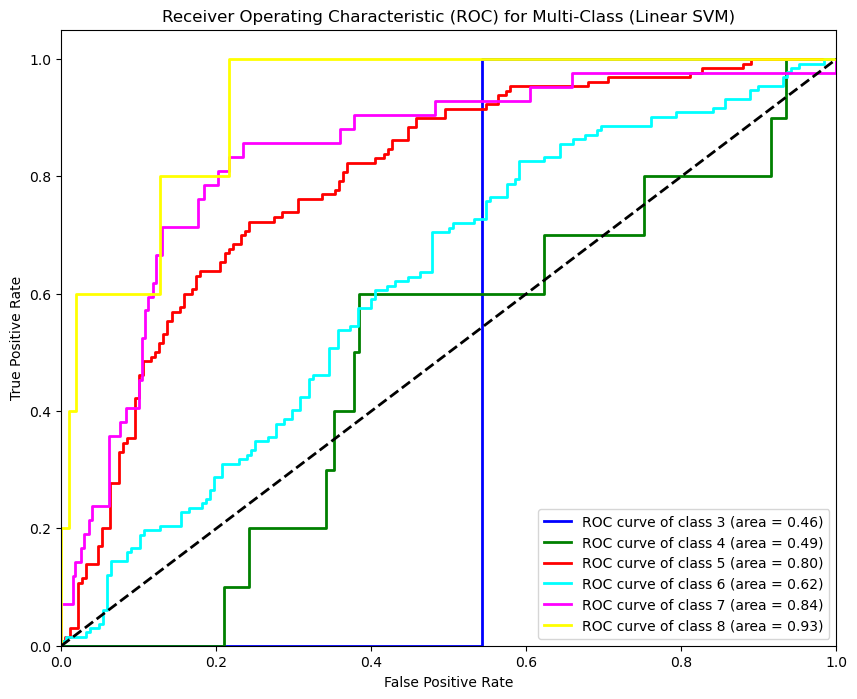

In [47]:
svm_linear_ovr = OneVsRestClassifier(SVC(kernel='linear', probability=True, random_state=42))

svm_linear_ovr.fit(X_train, y_train)

y_prob_svm_linear = svm_linear_ovr.predict_proba(X_test)

fpr_linear = dict()
tpr_linear = dict()
roc_auc_linear = dict()
for i in range(n_classes):
    fpr_linear[i], tpr_linear[i], _ = roc_curve(y_test_binarized[:, i], y_prob_svm_linear[:, i])
    roc_auc_linear[i] = auc(fpr_linear[i], tpr_linear[i])

# Plot all ROC curves for the linear SVM
plt.figure(figsize=(10, 8))

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_linear[i], tpr_linear[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i+3, roc_auc_linear[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Multi-Class (Linear SVM)')
plt.legend(loc="lower right")
plt.show()


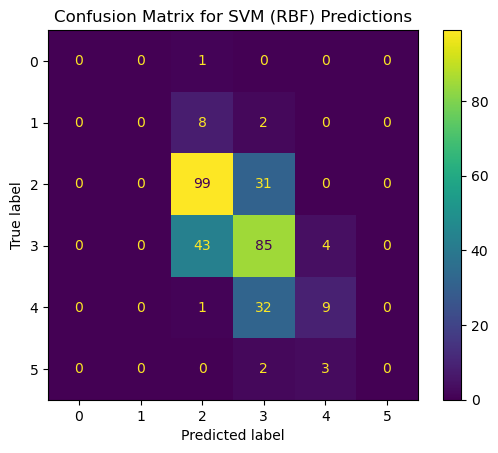

In [44]:
svm_rbf = SVC(kernel='rbf', random_state=42)

svm_rbf.fit(X_train, y_train)

y_pred_svm_rbf = svm_rbf.predict(X_test)

accuracy_svm_rbf = accuracy_score(y_test, y_pred_svm_rbf)
conf_matrix_svm_rbf = confusion_matrix(y_test, y_pred_svm_rbf)

accuracy_svm_rbf, conf_matrix_svm_rbf

ConfusionMatrixDisplay(conf_matrix_svm_rbf).plot(values_format='d')
plt.title('Confusion Matrix for SVM (RBF) Predictions')
plt.show()


In [45]:
accuracy_svm_rbf

0.603125

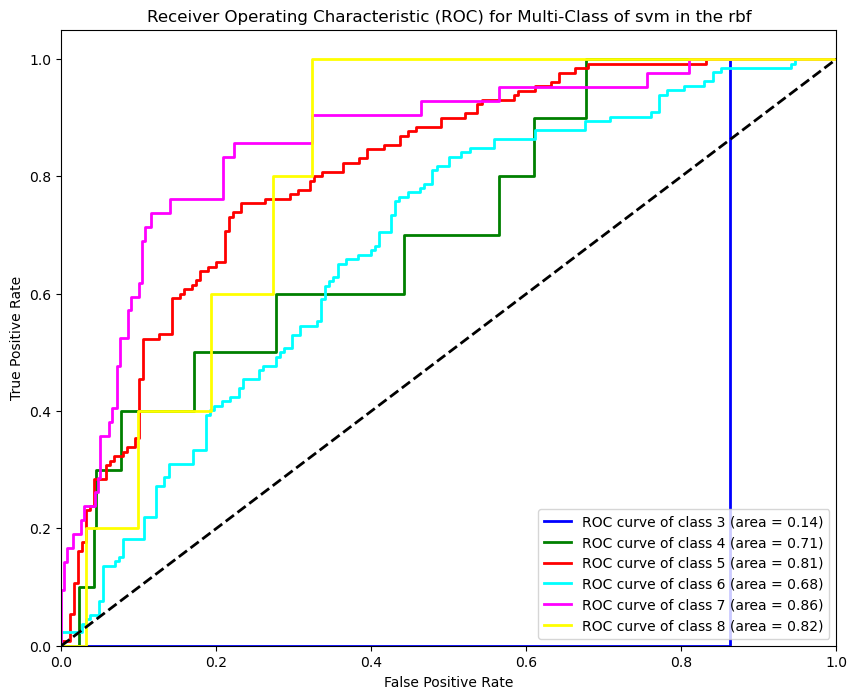

In [48]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
y_test_binarized = label_binarize(y_test, classes=np.unique(y_train))
svm_rbf_ovr = OneVsRestClassifier(SVC(kernel='rbf', probability=True, random_state=42))
svm_rbf_ovr.fit(X_train, y_train)
y_prob_svm_rbf = svm_rbf_ovr.predict_proba(X_test)
n_classes = y_test_binarized.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob_svm_rbf[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))

colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'pink', 'lightgreen', 'lightblue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i+3, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Multi-Class of svm in the rbf')
plt.legend(loc="lower right")
plt.show()
